## Importing the imp packages

In [102]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = kagglehub.dataset_download('behrad3d/nasa-cmaps')

print('Complete.')

Complete.


In [103]:
sample = pd.read_csv('CMAPSSData/train_FD001.txt')
sample.head()

,1 1 -0.0007 -0.0004 100.0 518.67 641.82 1589.70 1400.60 14.62 21.61 554.36 2388.06 9046.19 1.30 47.47 521.66 2388.02 8138.62 8.4195 0.03 392 2388 100.00 39.06 23.4190
0,1 2 0.0019 -0.0003 100.0 518.67 642.15 1591.82...
1,1 3 -0.0043 0.0003 100.0 518.67 642.35 1587.99...
2,1 4 0.0007 0.0000 100.0 518.67 642.35 1582.79 ...
3,1 5 -0.0019 -0.0002 100.0 518.67 642.37 1582.8...
4,1 6 -0.0043 -0.0001 100.0 518.67 642.10 1584.4...


## Loading the data 

In [104]:
index_names = ['unit','cycles'] # [engine_id,cycle_no]

#Atitutde , mach number, Throttle Resolver Angle
setting_names = ['setting_1', 'setting_2', 'setting_3']

#▪ T2: Total temperature at fan inlet (°R)
# ▪ T24: Total temperature at LPC outlet (°R)
# ▪ T30: Total temperature at HPC outlet (°R)
# ▪ T50: Total temperature at LPT outlet (°R)
# ▪ P2: Pressure at fan inlet (psia)
# ▪ P15: Total pressure in bypass-duct (psia)
# ▪ P30: Total pressure at HPC outlet (psia)
# ▪ Nf: Physical fan speed (rpm)
# ▪ Nc: Physical core speed (rpm)
# ▪ epr: Engine pressure ratio (P50/P2) [--]
# ▪ Ps30: Static pressure at HPC outlet (psia)
# ▪ phi: Ratio of fuel flow to Ps30 (pps/psi)
# ▪ NRf: Corrected fan speed (rpm)
# ▪ NRc: Corrected core speed (rpm)
# ▪ BPR: Bypass Ratio [--]
# ▪ farB: Burner fuel-air ratio [--]
# ▪ htBleed: Bleed Enthalpy [--]
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]

col_names = index_names + setting_names + sensor_names

In [105]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
            "(LPC outlet temperature) (◦R)",
            "(HPC outlet temperature) (◦R)",
            "(LPT outlet temperature) (◦R)",
            "(Fan inlet Pressure) (psia)",
            "(bypass-duct pressure) (psia)",
            "(HPC outlet pressure) (psia)",
            "(Physical fan speed) (rpm)",
            "(Physical core speed) (rpm)",
            "(Engine pressure ratio(P50/P2)",
            "(HPC outlet Static pressure) (psia)",
            "(Ratio of fuel flow to Ps30) (pps/psia)",
            "(Corrected fan speed) (rpm)",
            "(Corrected core speed) (rpm)",
            "(Bypass Ratio) ",
            "(Burner fuel-air ratio)",
            "(Bleed Enthalpy)",
            "(Required fan speed)",
            "(Required fan conversion speed)",
            "(High-pressure turbines Cool air flow)",
            "(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [106]:
#Seperating the values based on the one or multiple whitespaces
dftrain = pd.read_csv('CMAPSSData/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('CMAPSSData/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('CMAPSSData/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

train = dftrain.copy()
valid = dfvalid.copy()

### Pre-processing the data

### Taking care of null values if any

In [107]:
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit         0
cycles       0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64


In [108]:
print('Total None values in the valid dataset : ',valid.isna().sum())

Total None values in the valid dataset :  unit         0
cycles       0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64


No Missing values detected

### Checking the values in unit number and time cycles

In [109]:
train.loc[:,['unit','cycles','setting_1','setting_2','setting_3']].describe()

,unit,cycles,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0
std,29.227633,68.880990,0.002187,0.000293,0.0
min,1.000000,1.000000,-0.008700,-0.000600,100.0
25%,26.000000,52.000000,-0.001500,-0.000200,100.0
50%,52.000000,104.000000,0.000000,0.000000,100.0
75%,77.000000,156.000000,0.001500,0.000300,100.0
max,100.000000,362.000000,0.008700,0.000600,100.0


### Visualizing the sensor data 

In [110]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


### Checking and adding the RUL column

Seeing the graph below we can tell that there are some simulations whose run time is quite high and whose run times are quite low , in contrast to the majority of the engines that fail within the similar range, thus we we need to take care of our outliers.

Using the distribution plot for the max cycle times

Text(0.5, 9.444444444444438, 'max time cycle')

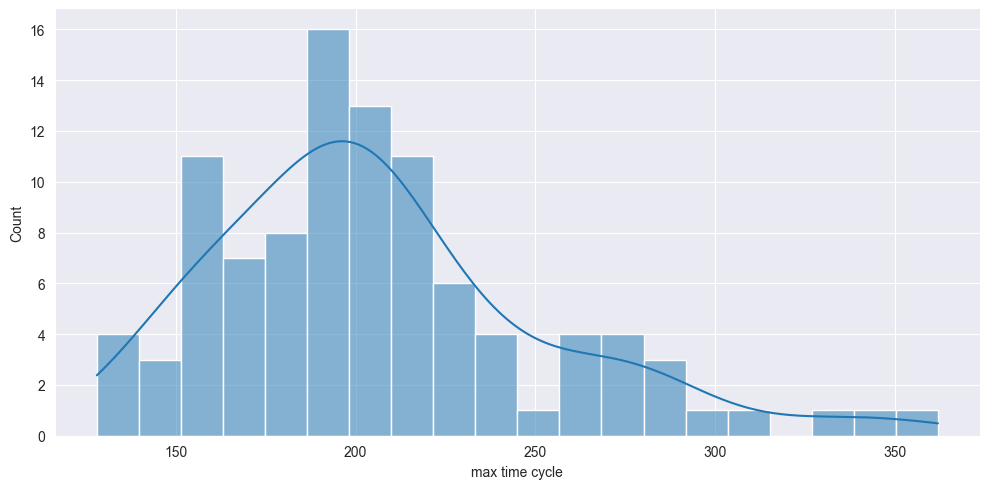

In [111]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['cycles'],kde=True,bins=20,height=5,aspect=2)
plt.xlabel('max time cycle')

Thus we can see that for most of the engines can only achieve the range of 210 to 220 cycles before failure

### Adding the RUL Column 
This would map the current input and output of the sensors to the number of cycles that it has remaining, thus helping us train this time series data 


In [112]:
train_grouped_by_unit = train.groupby(by='unit')
max_time_cycles = train_grouped_by_unit['cycles'].max()
merged = train.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit',right_index=True)
merged["RUL"] = merged["max_time_cycle"] - merged['cycles']
merged = merged.drop("max_time_cycle", axis=1)
train = merged
train[['unit','cycles','RUL']]
# Thus we have mapped the current unit and the cycle to the remaining time it has left before system goes kaboom

,unit,cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
20626,100,196,4
20627,100,197,3
20628,100,198,2
20629,100,199,1


### Discovering Correlations

There are 21 sensors measuring the current state of the engine, so we can use a correlation matrix to figure out which sensors are of the most importance to us.


<Axes: >

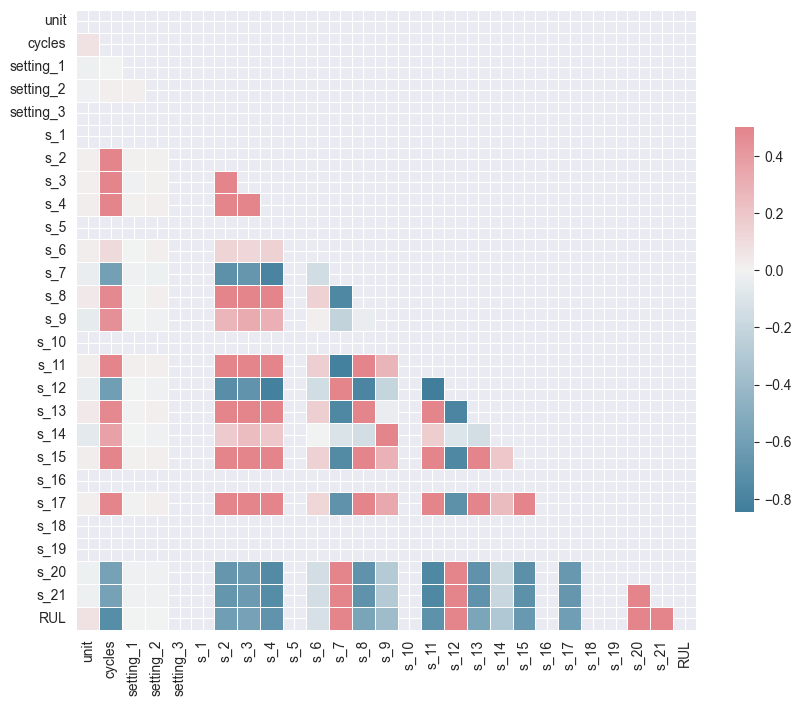

In [113]:
# Compute the correlation matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

The above matrix shows the pearson correlation matrix. 
The range of this matrix lies from -1 to +1 : -1 means a negative linear relationship and +1 means positive linear relationship
The upper half of this correlation matrix has been cropped because this graph would be a mirror image across that diagonal.

Conclusion from the corr map (looking at the last line of the map, corr of the RUL with sensors)
We can say there are some sensors whose readings are completely redundant to us because they have no relationship with the RUL.

Using the results from above we can say that the sensors : 1,5,10,16,18,19 are redundant when it comes to predicting the  RUL.
 

### Re-verifying the redundancy of the sensors

We will be plotting the line plot the sensor readings to the RUL to check their significance.
We will only choose a few engines (like the ones divisble by 4 to remove clutter) and mapping their curr value of the sensor for a engine to the time it has remaining. 

In [114]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(6,2))
    for i in df['unit'].unique():
        if i % 10 == 0:   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

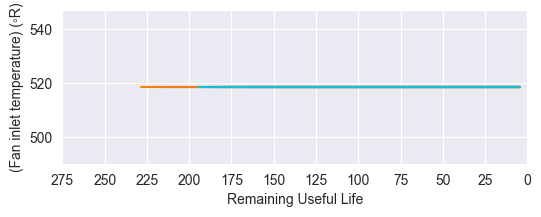

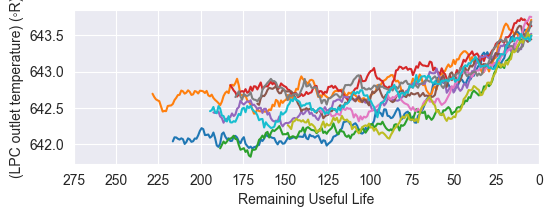

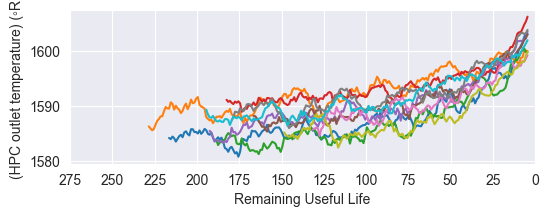

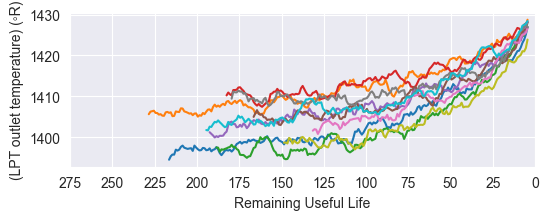

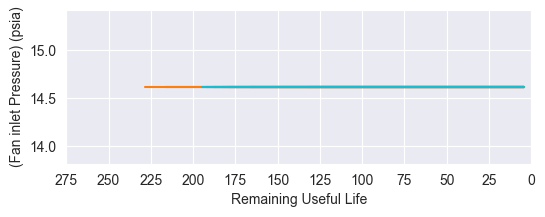

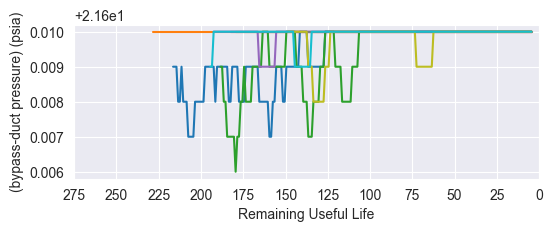

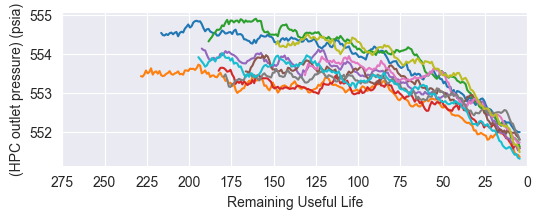

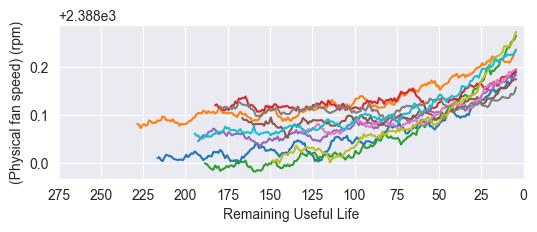

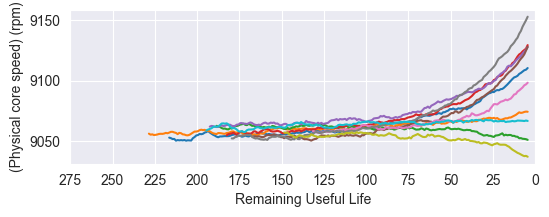

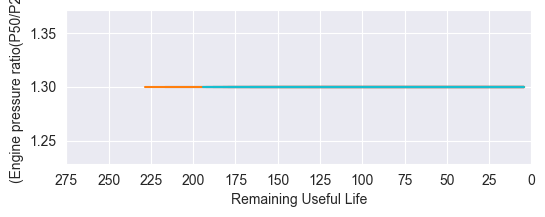

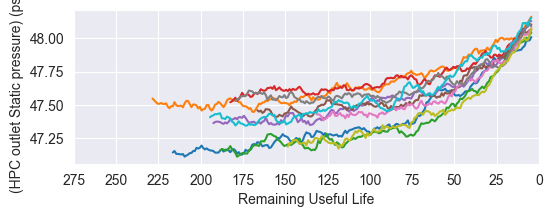

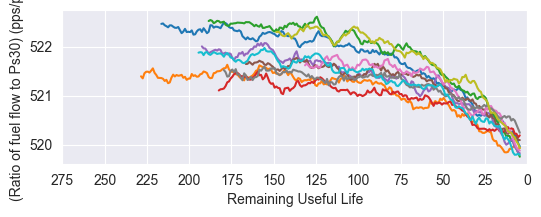

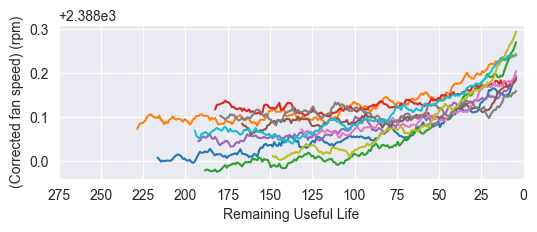

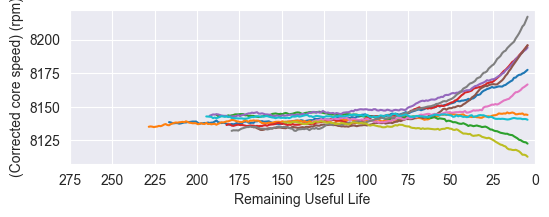

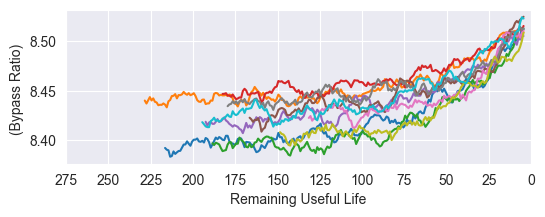

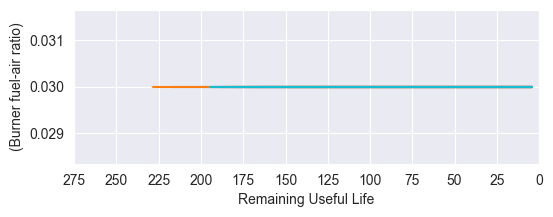

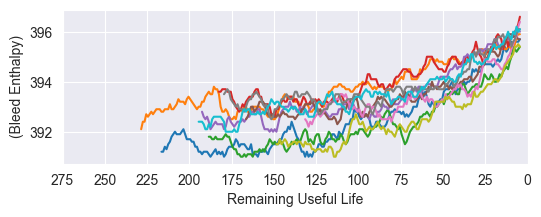

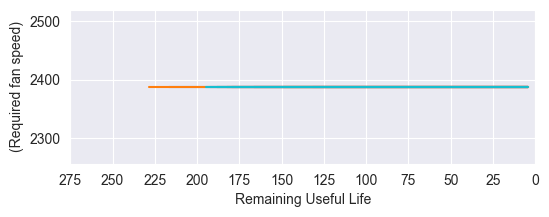

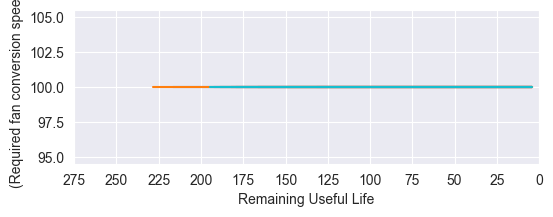

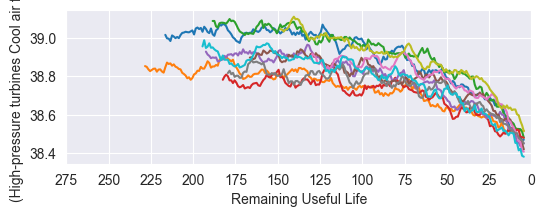

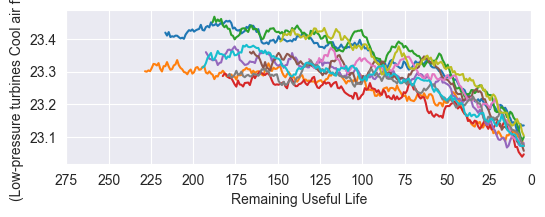

In [115]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

Seeing the results we can say that what the correlation matrix said was correct 
sensor numbers 1, 5, 10 , 18, 19 have no effect on the RUL

### Data Preprocessing

Split the data and drop the unit number and the settings as they do not contribute to the RUL prediciton.
We would train using the un-correlated sensors and the then drop them to see what effect we have

In [116]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names

X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

#### Scaling the data

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)
print(X_valid_s.shape)
print(y_valid.shape)

(100, 21)
(100, 1)


## Model Implementation

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [119]:
from sklearn.svm import SVR
#import tensorflow as tf
regressor = SVR(kernel='rbf')

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score


#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [125]:
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

#### Linear Regression

In [122]:
lr.fit(X=X_train_s, y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:44.7994102333131, R2:0.583093872579288
test set RMSE:46.09812141308134, R2:0.5360561298414096
valid set RMSE:43.00418868551116, R2:-0.07093219111567328


For the linear regression a negative R2 value is of great concern
THis means that the model does not generalize well on unseen data
This is so bad that it is worse than just predicting the mean.

#### Support Vector Regression

In [123]:
regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:43.56448464126648, R2:0.605761670162996
test set RMSE:47.26718449996112, R2:0.5122262167433573
valid set RMSE:43.00418868551116, R2:-0.07093219111567328


#### Random Forest

In [124]:
# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:15.408303170220156, R2:0.9506822432050425
test set RMSE:44.36383009860364, R2:0.5703082128383993
valid set RMSE:30.653618024631285, R2:0.45586841183607596


C:\Users\ankit\AppData\Local\Temp\ipykernel_25612\3272138402.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_values = [int(x) for x in y_test.values]


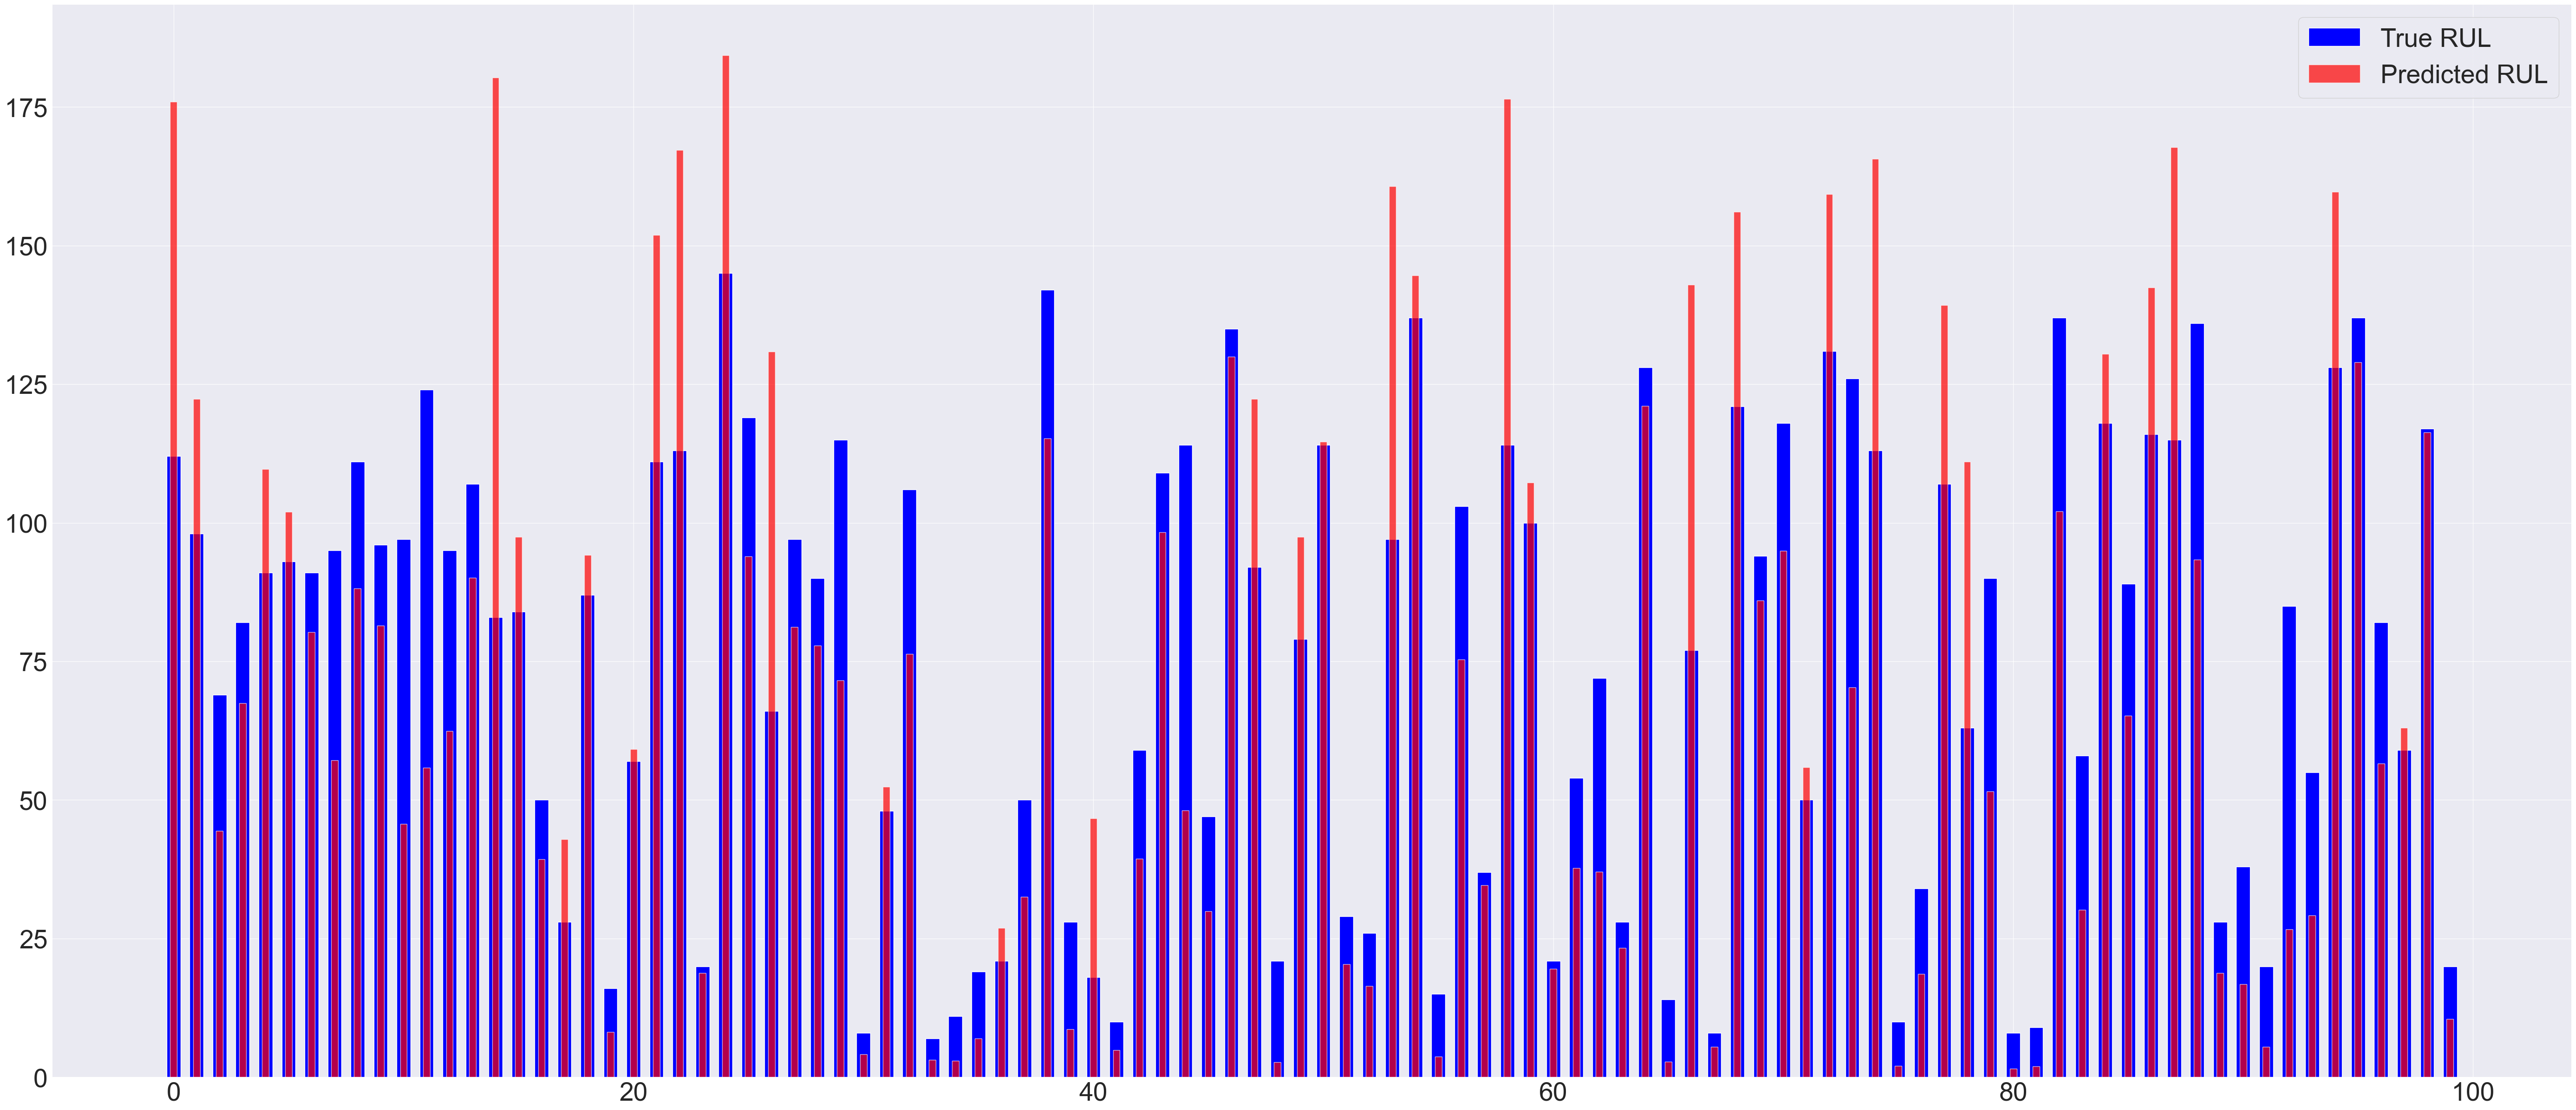

In [126]:
plot_predActual(y_valid, y_rf_valid)

### Now we remove the useless sensors and use the historical data

In this section we would clip the max life cycles to 195 because they would remove the outliers and make our model better.

In [127]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [129]:
lr=LinearRegression()
lr.fit(X=X_train_2_s, y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:35.92640871080577, R2:0.6502716889521982
test set RMSE:46.87318851003082, R2:0.5203240103333368
valid set RMSE:38.57016041891936, R2:0.13852367617035266


In [130]:
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.91543148706822, R2:0.7064363470171213
test set RMSE:48.75516379159361, R2:0.48103242301470384
valid set RMSE:25.947912225366203, R2:0.6101071274546097


In [131]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:33.917313503186506, R2:0.6882933378219604
test set RMSE:45.51790727628523, R2:0.547661542892456
valid set RMSE:23.6328447830358, R2:0.676575779914856


C:\Users\ankit\AppData\Local\Temp\ipykernel_25612\3272138402.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_values = [int(x) for x in y_test.values]


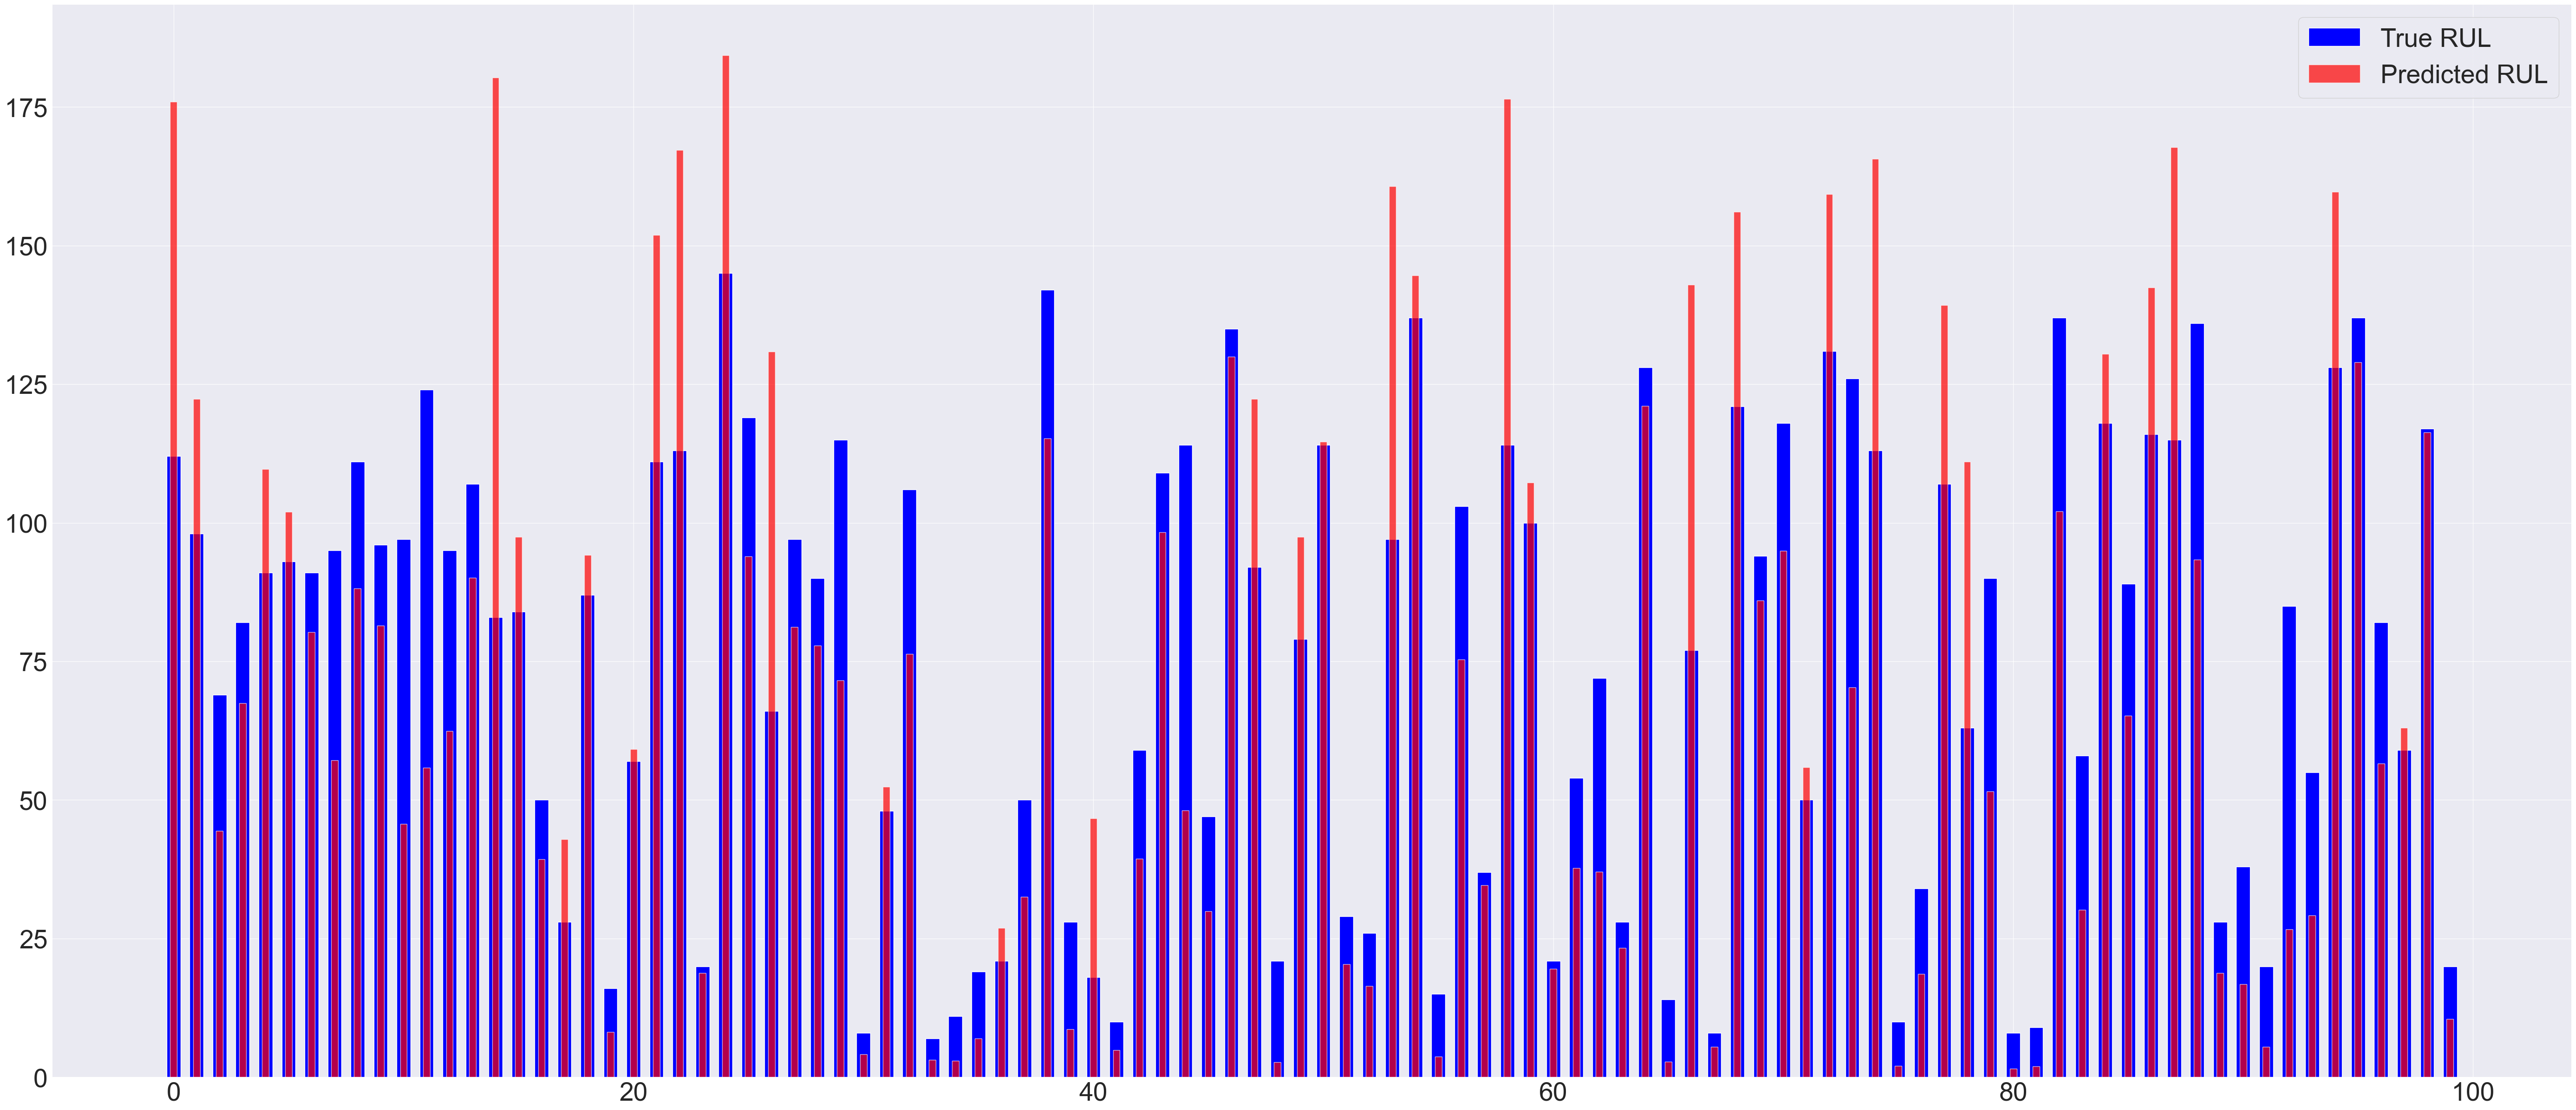

In [132]:
plot_predActual(y_valid, y_rf_valid)

### Now we try to implement the rolling mean feature

In [133]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0


df.columns


Index(['unit', 'cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2',
       's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21',
       'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm', 's_9_rm',
       's_11_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_15_rm', 's_17_rm',
       's_20_rm', 's_21_rm'],
      dtype='object')

In [134]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [153]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:].astype(float)
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

This is done to deal with the last line problem

Rolling mean calculation creates NaN values at the end of each engine's data
The fix copies the rolling mean values from the previous row to fill these NaN values
Assumption: The rolling mean doesn't change much between consecutive rows, so using the previous value is a reasonable approximation

In [154]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]
 


In [155]:
train_tm=df
train_tm=train_tm.drop(columns=index_names, axis=1)

In [156]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit').last().reset_index().drop(columns=['unit'])
X_valid_s=scaler.fit_transform(X_valid3)

Linear Regression 

In [157]:
lr=LinearRegression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:35.42192097028067, R2:0.6597022455059893
test set RMSE:36.20656087389735, R2:0.6368175454792206
valid set RMSE:45.982109308050575, R2:-0.22438566086142941


In [158]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.48452364307428, R2:0.7138011601047023
test set RMSE:33.82872041899003, R2:0.6829546036019843
valid set RMSE:26.590317383722343, R2:0.5905626119267564


In [159]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:9.787255139684294, R2:0.9740201473464815
test set RMSE:29.95828541820653, R2:0.7513524307207359
valid set RMSE:37.19248063789238, R2:0.19896637476274992


In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}


grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

# Prints the mean R2 score of all the possible combinations.
print(grid.best_score_ , grid.best_params_)

0.7868665638062088 {'max_depth': 10, 'n_estimators': 120}


In [152]:
rf=RandomForestRegressor(n_estimators=120,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:23.83641486228727, R2:0.8459020948425688
test set RMSE:30.100567495020034, R2:0.7489849985831569
valid set RMSE:38.78519611422832, R2:0.12889112320979412


The above results proves that the model is overfitting to the train/test dataset.
Tried out various combinations of n_estmators and max_depth but the observation remains the same

## Cross Validation

We will perform cross validation on the SVR model (best model so far) 

1: with rolling means and retraining the same model again and again for cross validation
2: with rolling mean but using a new model again and again
3: Without using rolling means 

In [164]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Initialize data and parameters
train_tm_cv = train_tm.copy()
y = train['RUL'].clip(upper=195)
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Lists to store scores
scores_train = []
scores_test = []
scores_validation = []

print("=== K-Fold Cross-Validation Results ===\n")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(cv.split(train_tm), 1):
    print(f"Fold {fold}/4")
    print("-" * 30)

    # Split data for this fold
    X_train_fold = train_tm.iloc[train_index, :]
    X_test_fold = train_tm.iloc[test_index, :]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    # Scale the data (fit on train, transform test)
    scaler_fold = MinMaxScaler()
    X_train_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled = scaler_fold.transform(X_test_fold)
    X_valid_scaled = scaler_fold.transform(X_valid3)

    # Train model
    regressor.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)
    y_valid_pred = regressor.predict(X_valid_scaled)

    # Calculate scores
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Store scores
    scores_train.append(train_r2)
    scores_test.append(test_r2)
    scores_validation.append(valid_r2)

    # Print results for this fold
    print(f"Train R²: {train_r2:.3f}")
    print(f"Test R²:  {test_r2:.3f}")
    print(f"Valid R²: {valid_r2:.3f}")
    print()

# Print summary statistics
print("=== Summary Statistics ===")
print(f"Train R² - Mean: {np.mean(scores_train):.3f}, Std: {np.std(scores_train):.3f}")
print(f"Test R²  - Mean: {np.mean(scores_test):.3f}, Std: {np.std(scores_test):.3f}")
print(f"Valid R² - Mean: {np.mean(scores_validation):.3f}, Std: {np.std(scores_validation):.3f}")



=== K-Fold Cross-Validation Results ===

Fold 1/4
------------------------------
Train R²: 0.715
Test R²:  0.698
Valid R²: 0.558

Fold 2/4
------------------------------
Train R²: 0.713
Test R²:  0.711
Valid R²: 0.560

Fold 3/4
------------------------------
Train R²: 0.710
Test R²:  0.721
Valid R²: 0.569

Fold 4/4
------------------------------
Train R²: 0.710
Test R²:  0.713
Valid R²: 0.574

=== Summary Statistics ===
Train R² - Mean: 0.712, Std: 0.002
Test R²  - Mean: 0.711, Std: 0.008
Valid R² - Mean: 0.565, Std: 0.007


In [165]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Initialize data and parameters
train_tm_cv = train_tm.copy()
y = train['RUL'].clip(upper=195)
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Lists to store scores
scores_train = []
scores_test = []
scores_validation = []

print("=== K-Fold Cross-Validation Results ===\n")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(cv.split(train_tm), 1):
    print(f"Fold {fold}/4")
    print("-" * 30)

    # Split data for this fold
    X_train_fold = train_tm.iloc[train_index, :]
    X_test_fold = train_tm.iloc[test_index, :]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    # Scale the data (fit on train, transform test)
    scaler_fold = MinMaxScaler()
    X_train_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled = scaler_fold.transform(X_test_fold)
    X_valid_scaled = scaler_fold.transform(X_valid3)

    # Train model
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)
    y_valid_pred = regressor.predict(X_valid_scaled)

    # Calculate scores
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Store scores
    scores_train.append(train_r2)
    scores_test.append(test_r2)
    scores_validation.append(valid_r2)

    # Print results for this fold
    print(f"Train R²: {train_r2:.3f}")
    print(f"Test R²:  {test_r2:.3f}")
    print(f"Valid R²: {valid_r2:.3f}")
    print()

# Print summary statistics
print("=== Summary Statistics ===")
print(f"Train R² - Mean: {np.mean(scores_train):.3f}, Std: {np.std(scores_train):.3f}")
print(f"Test R²  - Mean: {np.mean(scores_test):.3f}, Std: {np.std(scores_test):.3f}")
print(f"Valid R² - Mean: {np.mean(scores_validation):.3f}, Std: {np.std(scores_validation):.3f}")



=== K-Fold Cross-Validation Results ===

Fold 1/4
------------------------------
Train R²: 0.715
Test R²:  0.698
Valid R²: 0.558

Fold 2/4
------------------------------
Train R²: 0.713
Test R²:  0.711
Valid R²: 0.560

Fold 3/4
------------------------------
Train R²: 0.710
Test R²:  0.721
Valid R²: 0.569

Fold 4/4
------------------------------
Train R²: 0.710
Test R²:  0.713
Valid R²: 0.574

=== Summary Statistics ===
Train R² - Mean: 0.712, Std: 0.002
Test R²  - Mean: 0.711, Std: 0.008
Valid R² - Mean: 0.565, Std: 0.007


In [169]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize data and parameters
# Use train data without rolling means (after dropping constant sensors)
drop_labels2 = ['s_1', 's_5','s_6','s_10', 's_16', 's_18', 's_19']
train_clean = train.drop(columns=drop_labels2 + ['unit', 'cycles', 'setting_1', 'setting_2', 'setting_3','RUL'])

# Prepare target variable
y = train['RUL'].clip(upper=195)

# Initialize cross-validation
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Lists to store scores
scores_train = []
scores_test = []
scores_validation = []

print("=== K-Fold Cross-Validation (Without Rolling Means) ===\n")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(cv.split(train_clean), 1):
    print(f"Fold {fold}/4")
    print("-" * 40)

    # Split data for this fold
    X_train_fold = train_clean.iloc[train_index, :]
    X_test_fold = train_clean.iloc[test_index, :]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    # Scale the data (fit on train, transform test)
    scaler_fold = MinMaxScaler()
    X_train_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled = scaler_fold.transform(X_test_fold)

    # Prepare validation data (without rolling means)
    X_valid_clean = valid.groupby('unit').last().reset_index().drop(columns=drop_labels2 + ['unit', 'cycles', 'setting_1', 'setting_2', 'setting_3'])
    X_valid_scaled = scaler_fold.transform(X_valid_clean)

    # Train model
    regressor.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)
    y_valid_pred = regressor.predict(X_valid_scaled)

    # Calculate scores
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Store scores
    scores_train.append(train_r2)
    scores_test.append(test_r2)
    scores_validation.append(valid_r2)

    # Print results for this fold
    print(f"Train R²: {train_r2:.3f}")
    print(f"Test R²:  {test_r2:.3f}")
    print(f"Valid R²: {valid_r2:.3f}")
    print()

# Print summary statistics
print("=== Summary Statistics (Without Rolling Means) ===")
print(f"Train R² - Mean: {np.mean(scores_train):.3f}, Std: {np.std(scores_train):.3f}")
print(f"Test R²  - Mean: {np.mean(scores_test):.3f}, Std: {np.std(scores_test):.3f}")
print(f"Valid R² - Mean: {np.mean(scores_validation):.3f}, Std: {np.std(scores_validation):.3f}")


=== K-Fold Cross-Validation (Without Rolling Means) ===

Fold 1/4
----------------------------------------
Train R²: 0.705
Test R²:  0.687
Valid R²: 0.591

Fold 2/4
----------------------------------------
Train R²: 0.702
Test R²:  0.699
Valid R²: 0.593

Fold 3/4
----------------------------------------
Train R²: 0.699
Test R²:  0.711
Valid R²: 0.603

Fold 4/4
----------------------------------------
Train R²: 0.699
Test R²:  0.702
Valid R²: 0.606

=== Summary Statistics (Without Rolling Means) ===
Train R² - Mean: 0.701, Std: 0.002
Test R²  - Mean: 0.700, Std: 0.008
Valid R² - Mean: 0.598, Std: 0.007


Final Result:
| Approach              | Train R² | Test R² | Valid R²  | Comment                                                          |
| --------------------- | -------- | ------- | --------- | ---------------------------------------------------------------- |
| Without rolling means | 0.701    | 0.700   | **0.598** | Slightly lower train/test but **highest validation performance** |
| New model each time   | 0.712    | 0.711   | 0.565     | Higher train/test but drop in validation — possible overfitting  |
| Retraining same model | 0.712    | 0.711   | 0.565     | Essentially same as above — same validation drop                 |


In [170]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize data and parameters
train_tm_cv = train_tm.copy()
y = train['RUL'].clip(upper=195)
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Lists to store scores
scores_train_r2 = []
scores_test_r2 = []
scores_valid_r2 = []

scores_train_rmse = []
scores_test_rmse = []
scores_valid_rmse = []

print("=== K-Fold Cross-Validation Results ===\n")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(cv.split(train_tm), 1):
    print(f"Fold {fold}/4")
    print("-" * 30)

    # Split data for this fold
    X_train_fold = train_tm.iloc[train_index, :]
    X_test_fold = train_tm.iloc[test_index, :]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    # Scale the data (fit on train, transform test)
    scaler_fold = MinMaxScaler()
    X_train_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled = scaler_fold.transform(X_test_fold)
    X_valid_scaled = scaler_fold.transform(X_valid3)

    # Train model
    regressor.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)
    y_valid_pred = regressor.predict(X_valid_scaled)

    # Calculate R²
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_fold, y_test_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    # Store scores
    scores_train_r2.append(train_r2)
    scores_test_r2.append(test_r2)
    scores_valid_r2.append(valid_r2)

    scores_train_rmse.append(train_rmse)
    scores_test_rmse.append(test_rmse)
    scores_valid_rmse.append(valid_rmse)

    # Print results for this fold
    print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
    print(f"Test R²:  {test_r2:.3f}, RMSE: {test_rmse:.3f}")
    print(f"Valid R²: {valid_r2:.3f}, RMSE: {valid_rmse:.3f}")
    print()

# Print summary statistics
print("=== Summary Statistics ===")
print(f"Train R²  - Mean: {np.mean(scores_train_r2):.3f}, Std: {np.std(scores_train_r2):.3f}")
print(f"Test R²   - Mean: {np.mean(scores_test_r2):.3f}, Std: {np.std(scores_test_r2):.3f}")
print(f"Valid R²  - Mean: {np.mean(scores_valid_r2):.3f}, Std: {np.std(scores_valid_r2):.3f}")

print(f"Train RMSE - Mean: {np.mean(scores_train_rmse):.3f}, Std: {np.std(scores_train_rmse):.3f}")
print(f"Test RMSE  - Mean: {np.mean(scores_test_rmse):.3f}, Std: {np.std(scores_test_rmse):.3f}")
print(f"Valid RMSE - Mean: {np.mean(scores_valid_rmse):.3f}, Std: {np.std(scores_valid_rmse):.3f}")


=== K-Fold Cross-Validation Results ===

Fold 1/4
------------------------------
Train R²: 0.715, RMSE: 32.395
Test R²:  0.698, RMSE: 32.839
Valid R²: 0.558, RMSE: 27.622

Fold 2/4
------------------------------
Train R²: 0.713, RMSE: 32.402
Test R²:  0.711, RMSE: 32.564
Valid R²: 0.560, RMSE: 27.577

Fold 3/4
------------------------------
Train R²: 0.710, RMSE: 32.542
Test R²:  0.721, RMSE: 32.074
Valid R²: 0.569, RMSE: 27.272

Fold 4/4
------------------------------
Train R²: 0.710, RMSE: 32.489
Test R²:  0.713, RMSE: 32.655
Valid R²: 0.574, RMSE: 27.113

=== Summary Statistics ===
Train R²  - Mean: 0.712, Std: 0.002
Test R²   - Mean: 0.711, Std: 0.008
Valid R²  - Mean: 0.565, Std: 0.007
Train RMSE - Mean: 32.457, Std: 0.061
Test RMSE  - Mean: 32.533, Std: 0.283
Valid RMSE - Mean: 27.396, Std: 0.212


In [171]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize data and parameters
drop_labels2 = ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
train_clean = train.drop(columns=drop_labels2 + ['unit', 'cycles', 'setting_1', 'setting_2', 'setting_3', 'RUL'])

# Prepare target variable
y = train['RUL'].clip(upper=195)

# Initialize cross-validation
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Lists to store scores
scores_train_r2 = []
scores_test_r2 = []
scores_valid_r2 = []

scores_train_rmse = []
scores_test_rmse = []
scores_valid_rmse = []

print("=== K-Fold Cross-Validation (Without Rolling Means) ===\n")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(cv.split(train_clean), 1):
    print(f"Fold {fold}/4")
    print("-" * 40)

    # Split data for this fold
    X_train_fold = train_clean.iloc[train_index, :]
    X_test_fold = train_clean.iloc[test_index, :]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    # Scale the data (fit on train, transform test)
    scaler_fold = MinMaxScaler()
    X_train_scaled = scaler_fold.fit_transform(X_train_fold)
    X_test_scaled = scaler_fold.transform(X_test_fold)

    # Prepare validation data (without rolling means)
    X_valid_clean = valid.groupby('unit').last().reset_index().drop(
        columns=drop_labels2 + ['unit', 'cycles', 'setting_1', 'setting_2', 'setting_3']
    )
    X_valid_scaled = scaler_fold.transform(X_valid_clean)

    # Train model
    regressor.fit(X_train_scaled, y_train_fold)

    # Make predictions
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)
    y_valid_pred = regressor.predict(X_valid_scaled)

    # Calculate R²
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_fold, y_test_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    # Store scores
    scores_train_r2.append(train_r2)
    scores_test_r2.append(test_r2)
    scores_valid_r2.append(valid_r2)

    scores_train_rmse.append(train_rmse)
    scores_test_rmse.append(test_rmse)
    scores_valid_rmse.append(valid_rmse)

    # Print results for this fold
    print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
    print(f"Test R²:  {test_r2:.3f}, RMSE: {test_rmse:.3f}")
    print(f"Valid R²: {valid_r2:.3f}, RMSE: {valid_rmse:.3f}")
    print()

# Print summary statistics
print("=== Summary Statistics (Without Rolling Means) ===")
print(f"Train R²  - Mean: {np.mean(scores_train_r2):.3f}, Std: {np.std(scores_train_r2):.3f}")
print(f"Test R²   - Mean: {np.mean(scores_test_r2):.3f}, Std: {np.std(scores_test_r2):.3f}")
print(f"Valid R²  - Mean: {np.mean(scores_valid_r2):.3f}, Std: {np.std(scores_valid_r2):.3f}")

print(f"Train RMSE - Mean: {np.mean(scores_train_rmse):.3f}, Std: {np.std(scores_train_rmse):.3f}")
print(f"Test RMSE  - Mean: {np.mean(scores_test_rmse):.3f}, Std: {np.std(scores_test_rmse):.3f}")
print(f"Valid RMSE - Mean: {np.mean(scores_valid_rmse):.3f}, Std: {np.std(scores_valid_rmse):.3f}")


=== K-Fold Cross-Validation (Without Rolling Means) ===

Fold 1/4
----------------------------------------
Train R²: 0.705, RMSE: 32.984
Test R²:  0.687, RMSE: 33.434
Valid R²: 0.591, RMSE: 26.584

Fold 2/4
----------------------------------------
Train R²: 0.702, RMSE: 32.996
Test R²:  0.699, RMSE: 33.220
Valid R²: 0.593, RMSE: 26.518

Fold 3/4
----------------------------------------
Train R²: 0.699, RMSE: 33.142
Test R²:  0.711, RMSE: 32.613
Valid R²: 0.603, RMSE: 26.171

Fold 4/4
----------------------------------------
Train R²: 0.699, RMSE: 33.092
Test R²:  0.702, RMSE: 33.270
Valid R²: 0.606, RMSE: 26.074

=== Summary Statistics (Without Rolling Means) ===
Train R²  - Mean: 0.701, Std: 0.002
Test R²   - Mean: 0.700, Std: 0.008
Valid R²  - Mean: 0.598, Std: 0.007
Train RMSE - Mean: 33.053, Std: 0.066
Test RMSE  - Mean: 33.134, Std: 0.311
Valid RMSE - Mean: 26.337, Std: 0.218


We can say that without using the the rolling mean the model performs better
Comparing both the R2 value and rmse values.

In [172]:
y_train_tm

12276     30
8157      80
11666    103
12639    124
5278      30
        ... 
11284    107
11964    162
5390      74
860      195
15795    157
Name: RUL, Length: 13410, dtype: int64

In [176]:

label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}
dftm= pd.concat([train['unit'],train_tm,train['RUL']],axis=1)
y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [178]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [179]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [180]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [181]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)

y_valid_c=np.array(y_valid_c)

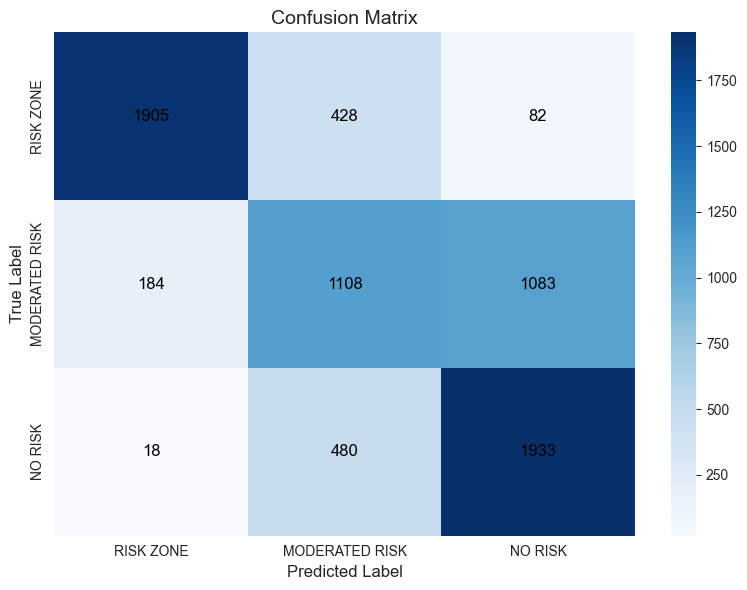

SVM
Accuracy score of training: 0.688
Error rate of training: 0.176
Accuracy score of test: 0.685
Error rate of test: 0.194
              precision    recall  f1-score   support

           1       0.90      0.79      0.84      2415
           2       0.55      0.47      0.50      2375
           3       0.62      0.80      0.70      2431

    accuracy                           0.68      7221
   macro avg       0.69      0.68      0.68      7221
weighted avg       0.69      0.68      0.68      7221


In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Train and predict
classifier.fit(X_train_tm_cs, np.array(y_train_tm_c))
y_svc_train = classifier.predict(X_train_tm_cs)
y_svc_test = classifier.predict(X_test_tm_cs)

# Confusion matrix
cm = confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)

# Plot with seaborn heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, fmt='g', cmap='Blues', cbar=True,
    xticklabels=[label_map[c] for c in classifier.classes_],
    yticklabels=[label_map[c] for c in classifier.classes_],
    annot_kws={"size": 12, "color": "black"}  # bigger, visible text
)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Performance metrics
print('SVM')
print(f"Accuracy score of training: {accuracy_score(y_train_tm_c, y_svc_train):.3f}")
print(f"Error rate of training: {mean_absolute_percentage_error(y_train_tm_c, y_svc_train):.3f}")
print(f"Accuracy score of test: {accuracy_score(y_test_tm_c, y_svc_test):.3f}")
print(f"Error rate of test: {mean_absolute_percentage_error(y_test_tm_c, y_svc_test):.3f}")
print(classification_report(y_test_tm_c, y_svc_test))


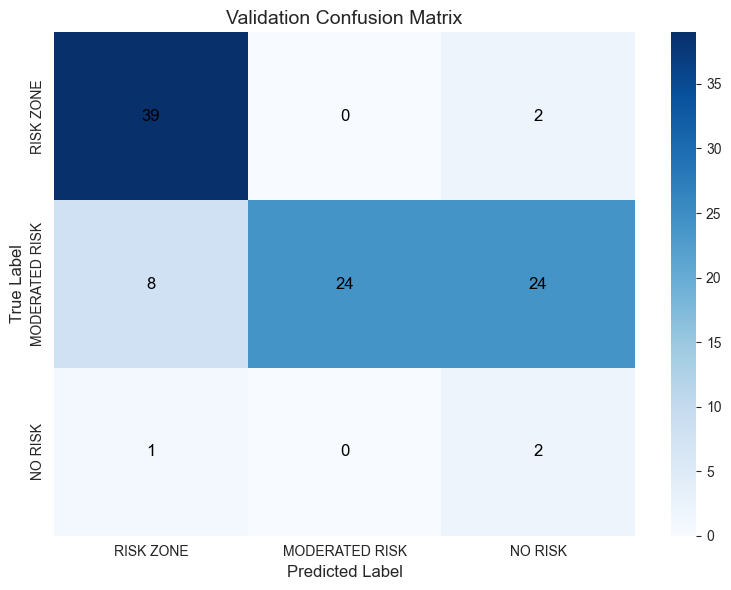

SVM
Accuracy score of validation: 0.650
Error rate of validation: 0.207


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_percentage_error

# Predictions
y_svc_valid = classifier.predict(X_valid_s)

# Confusion matrix
cm = confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, fmt='g', cmap='Blues', cbar=True,
    xticklabels=[label_map[c] for c in classifier.classes_],
    yticklabels=[label_map[c] for c in classifier.classes_],
    annot_kws={"size": 12, "color": "black"}  # larger, high-contrast text
)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Validation Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Performance metrics
print('SVM')
print(f"Accuracy score of validation: {accuracy_score(y_valid_c, y_svc_valid):.3f}")
print(f"Error rate of validation: {mean_absolute_percentage_error(y_valid_c, y_svc_valid):.3f}")


## Random Forest Classifier

In [186]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

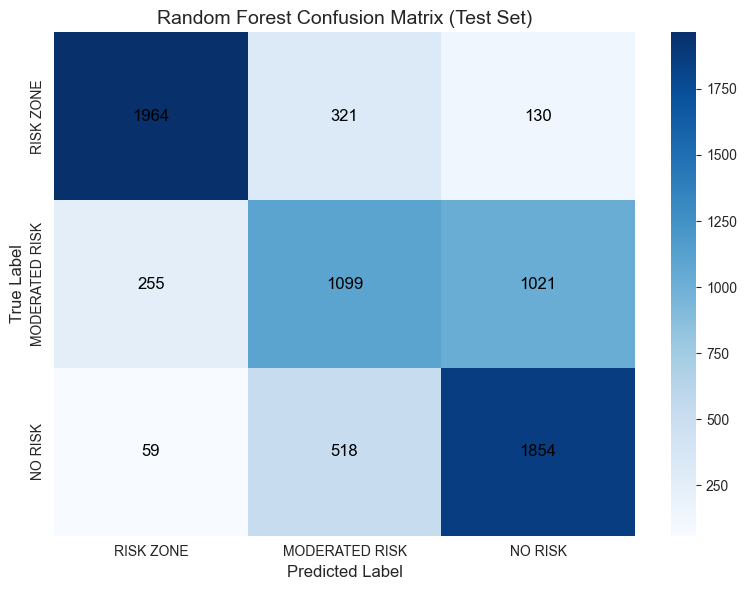

Random Forest Classifier
Accuracy score of training: 0.974
Error rate of training: 0.015
Accuracy score of test: 0.681
Error rate of test: 0.198
              precision    recall  f1-score   support

           1       0.86      0.81      0.84      2415
           2       0.57      0.46      0.51      2375
           3       0.62      0.76      0.68      2431

    accuracy                           0.68      7221
   macro avg       0.68      0.68      0.68      7221
weighted avg       0.68      0.68      0.68      7221


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_percentage_error

# Fit model
clf.fit(X_train_tm_cs, np.array(y_train_tm_c))

# Predictions
y_rfc_train = clf.predict(X_train_tm_cs)
y_rfc_test = clf.predict(X_test_tm_cs)

# Confusion matrix
cm = confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)

# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, fmt='g', cmap='Blues', cbar=True,
    xticklabels=[label_map[c] for c in clf.classes_],
    yticklabels=[label_map[c] for c in clf.classes_],
    annot_kws={"size": 12, "color": "black"}  # larger high-contrast text
)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Random Forest Confusion Matrix (Test Set)', fontsize=14)
plt.tight_layout()
plt.show()

# Performance metrics
print('Random Forest Classifier')
print(f"Accuracy score of training: {accuracy_score(y_train_tm_c, y_rfc_train):.3f}")
print(f"Error rate of training: {mean_absolute_percentage_error(y_train_tm_c, y_rfc_train):.3f}")

print(f"Accuracy score of test: {accuracy_score(y_test_tm_c, y_rfc_test):.3f}")
print(f"Error rate of test: {mean_absolute_percentage_error(y_test_tm_c, y_rfc_test):.3f}")

print(metrics.classification_report(y_test_tm_c, y_rfc_test))


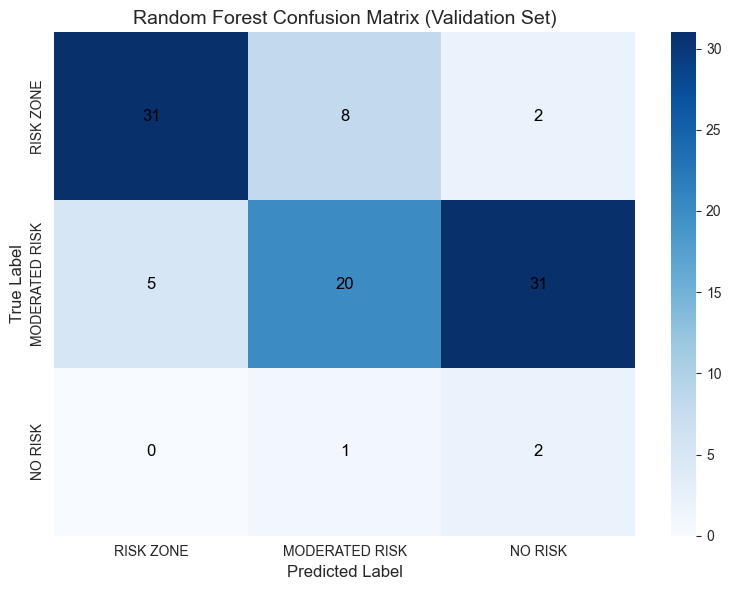

Random Forest Classifier
Accuracy score of validation: 0.530
Error rate of validation: 0.303
              precision    recall  f1-score   support

           1       0.86      0.76      0.81        41
           2       0.69      0.36      0.47        56
           3       0.06      0.67      0.11         3

    accuracy                           0.53       100
   macro avg       0.54      0.59      0.46       100
weighted avg       0.74      0.53      0.60       100


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_percentage_error, classification_report

# Predictions for validation set
y_rfc_valid = clf.predict(X_valid_s)

# Confusion matrix
cm = confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, fmt='g', cmap='Blues', cbar=True,
    xticklabels=[label_map[c] for c in clf.classes_],
    yticklabels=[label_map[c] for c in clf.classes_],
    annot_kws={"size": 12, "color": "black"}  # larger, high-contrast text
)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Random Forest Confusion Matrix (Validation Set)', fontsize=14)
plt.tight_layout()
plt.show()

# Performance metrics
print('Random Forest Classifier')
print(f"Accuracy score of validation: {accuracy_score(y_valid_c, y_rfc_valid):.3f}")
print(f"Error rate of validation: {mean_absolute_percentage_error(y_valid_c, y_rfc_valid):.3f}")
print(classification_report(y_valid_c, y_rfc_valid))
